# Simple Linear Regression

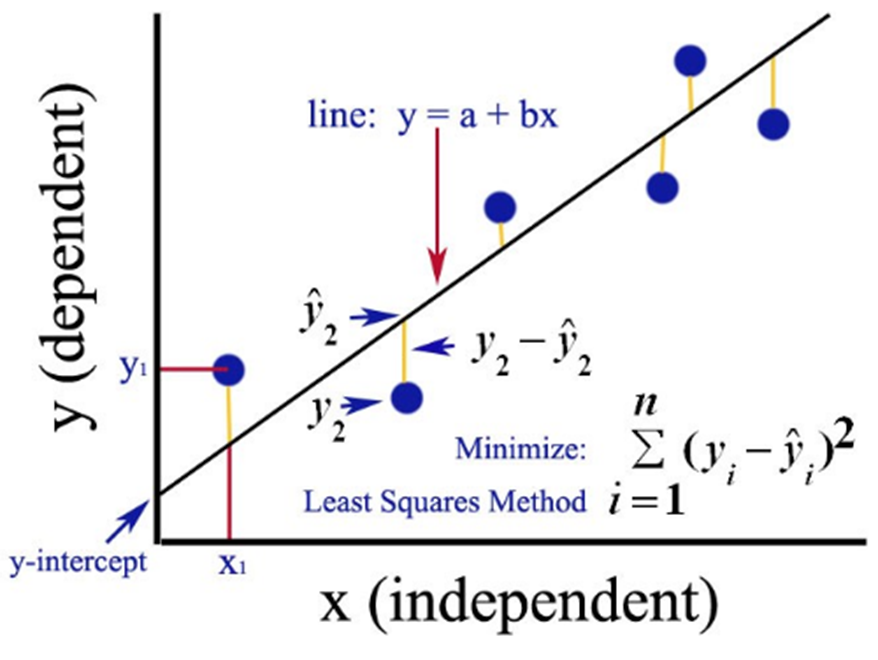

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


# Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info

<bound method DataFrame.info of           RND      ADMIN        MKT       STATE     PROFIT
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84

In [4]:
df.isna()

,RND,ADMIN,MKT,STATE,PROFIT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [8]:
df.duplicated().sum()

0

# PROFIT ~ RND

# PROFIT = B0 + B1*RND

# Seperate X(RND) and Y(PROFIT)

<Axes: xlabel='RND', ylabel='PROFIT'>

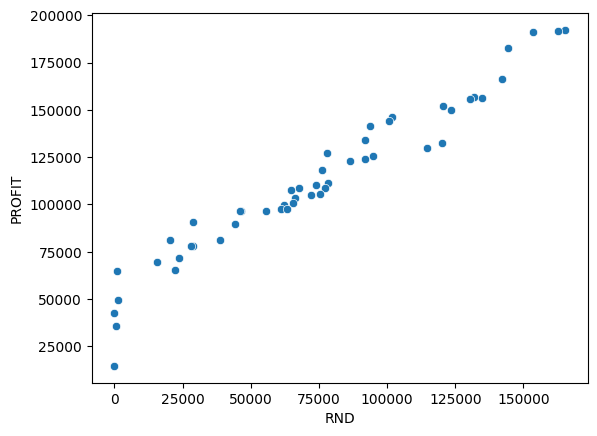

In [9]:
import seaborn as sns
sns.scatterplot(data=df, x = "RND", y="PROFIT")

In [17]:
X = df[['RND']]
Y = df[['PROFIT']]

In [18]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [19]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Creating a linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)


LinearRegression()

# Get model intercept and coefficent

In [21]:
# for slope i.e B1
model.coef_

array([[0.85429137]])

In [22]:
# for intercept i.e B0 ---constant term
model.intercept_

array([49032.89914125])

# PROFIT_pred = 49032.89 + 0.8543*RND

<Axes: xlabel='RND', ylabel='PROFIT'>

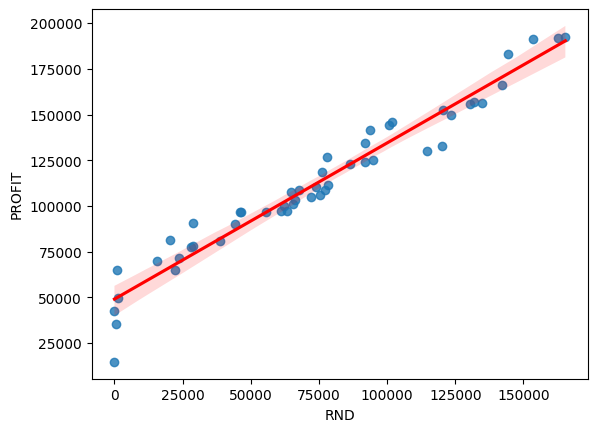

In [23]:
## here ci is confidence interval
sns.regplot(data = df , x = "RND" , y="PROFIT" , line_kws={'color':'red'} , ci=99)


# Predicting out of sample data

In [25]:
rnd = [[120000]]
profit_pred = model.predict(rnd)
profit_pred

array([[151547.86365391]])

# Model Evaluation


# 1.Mean Squared Error (MSE)
# 2. Root mean squared error (RMSE)
# 3. Mean Absolute error (MAE)
# 4. Mean Absolute Percentage Error (MAPE)
# 5. R2 Score

In [27]:
# to check R2 score
# nte : if R2 score is greater than 80% than it is  good fit model for linear data( R2>80% )
model.score(X,Y)

0.9465353160804393

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
#if we have to check predicted value of Y
Ypred = model.predict(X)
Ypred

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032],
       [161694.19683741],
       [164033.72501421],
       [160345.46724972],
       [152011.33380847],
       [154396.82286103],
       [136096.36397105],
       [135036.08586475],
       [129219.89081021],
       [127621.20411029],
       [151499.37407569],
       [146869.43093301],
       [115678.82583435],
       [129897.69412683],
       [127413.41482014],
       [122860.50313037],
       [114175.91374003],
       [116000.34693472],
       [112245.81324567],
       [106725.35677792],
       [114850.93206678],
       [104275.40289851],
       [113385.70276482],
       [110633.79960036],
       [105460.14271464],
       [105079.09459155],
       [101994.24845109],
       [101261.18102569],
       [103202.54108032],
       [ 96440.90176556],
       [ 88694.29012885],
       [ 88342.27936946],
       [ 73520.10196791],
       [ 86681.47714396],
       [ 663

In [32]:
Ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [33]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [35]:
# to check mean squared error
mse = mean_squared_error(Y , Ypred)
mse

85120931.32706906

In [36]:
# to check root squared mean error
rsme = mse**(1/2)
rsme

9226.100548285232

In [37]:
# to check mean absolute error
mae = mean_absolute_error(Y , Ypred)
mae

6910.98435457961

In [38]:
# to check mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y , Ypred)
mape

0.11070141081984847

In [41]:
# as we checked above the score of R2 using model.score() ,,we can also use this method
from sklearn.metrics import r2_score
R2 = r2_score(Y , Ypred)
R2

0.9465353160804393

# Because R2 score > 0.8 the model build is very good and can be used for out of sample predictions